In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download and store the Fashion MNIST dataset

In [10]:
data_path = "mnist.npz" 
(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.mnist.load_data(data_path)

# Reshape and Normalise the data

In [5]:
def reshape_and_normalise(images):
    # Reshape the images to add an extra dimension
    images = np.reshape(images, (images.shape + (1,)) )
    
    # Normalise pixel values
    images = np.divide(images, 255.0)

    return images

In [19]:
# Reload the images in this cell is run multiple times
(training_images, _), (testing_images, _) = tf.keras.datasets.mnist.load_data(data_path) 

training_images = reshape_and_normalise(training_images)
testing_images = reshape_and_normalise(testing_images)

print("Training:")
print(f"Maximum pixel value after normalization: {np.max(training_images)}")
print(f"Shape of training set after reshaping: {training_images.shape}")
print(f"Shape of one image after reshaping: {training_images[0].shape}")
print("\nTesting:")
print(f"Maximum pixel value after normalization: {np.max(testing_images)}")
print(f"Shape of training set after reshaping: {testing_images.shape}")
print(f"Shape of one image after reshaping: {testing_images[0].shape}")

Training:
Maximum pixel value after normalization: 1.0
Shape of training set after reshaping: (60000, 28, 28, 1)
Shape of one image after reshaping: (28, 28, 1)

Testing:
Maximum pixel value after normalization: 1.0
Shape of training set after reshaping: (10000, 28, 28, 1)
Shape of one image after reshaping: (28, 28, 1)


# Implement Callback to cancel training once reaching 99.5% accuracy

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    # Define method that checks accuracy at the end of each epoch
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
            print('\nReached 99.5% accuracy. Cancelled training!')
            self.model.stop_training = True


# Convolutional Model

In [8]:
def convolutional_model():
    # Define the model
    model = tf.keras.models.Sequential([
        # Conv2D layer with 32 filters, kernel_size of 3x3, ReLU activation function and input_shape to match dimensions from the dataset
        tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu, input_shape = (28,28,1)), 
        # MaxPooling2D layer with a pool_size of 2x2
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(128, activation = tf.nn.relu),
        tf.keras.layers.Dense(10, activation = tf.nn.softmax)
    ]) 

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
        
    return model

In [14]:
# Save the untrained model
model = convolutional_model()

# Extract the number of weights
model_params = model.count_params()

# Instantiate the callback class
callbacks = myCallback()

# Train the model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks], validation_data = (testing_images, testing_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1499 - accuracy: 0.9563 - val_loss: 0.0649 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0479 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0588 - val_accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0473 - val_accuracy: 0.9849
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9957
Reached 99.5% accuracy. Cancelled training!
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0498 - val_accuracy: 0.9858


# Plot the Accuracy/Loss for Training and Validation

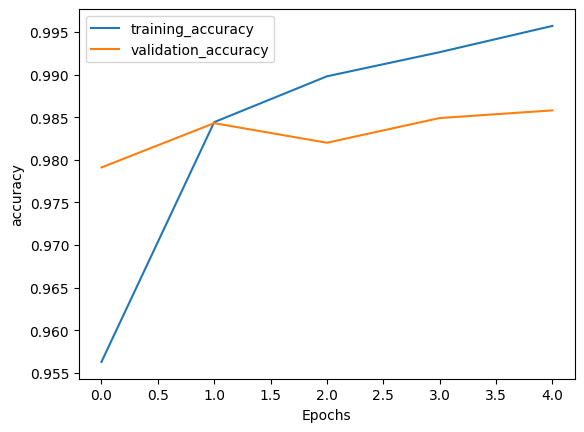

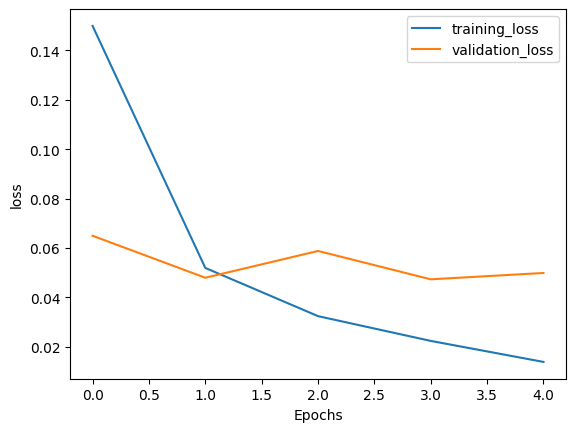

In [17]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([f'training_{metric}', f'validation_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")